<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C2W1_Convolution_Neural_Network_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-12-21 10:47:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   218MB/s    in 0.3s    

2020-12-21 10:47:37 (218 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [13]:
import os, zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [14]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [15]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.837.jpg', 'cat.552.jpg', 'cat.852.jpg', 'cat.967.jpg', 'cat.903.jpg', 'cat.769.jpg', 'cat.817.jpg', 'cat.171.jpg', 'cat.795.jpg', 'cat.267.jpg']
['dog.929.jpg', 'dog.33.jpg', 'dog.805.jpg', 'dog.318.jpg', 'dog.939.jpg', 'dog.309.jpg', 'dog.126.jpg', 'dog.723.jpg', 'dog.781.jpg', 'dog.698.jpg']


In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

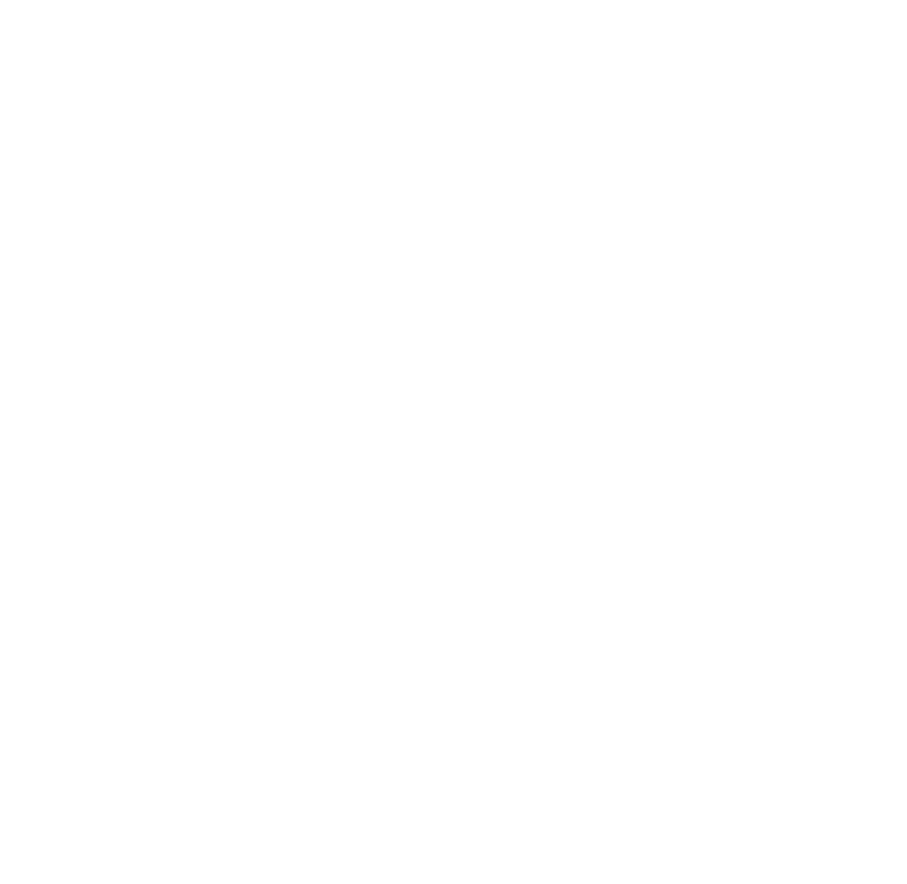

In [17]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  # plt.imshow(img)

# plt.show()

In [18]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator =  train_datagen.flow_from_directory(train_dir,
                                                     batch_size=20,
                                                     class_mode='binary',
                                                     target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit(train_generator,
                      validation_data=validation_generator,
                      steps_per_epoch=100,
                      epochs=15,
                      validation_steps=50,
                      verbose=2)

Epoch 1/15
100/100 - 10s - loss: 0.7020 - accuracy: 0.5750 - val_loss: 0.6386 - val_accuracy: 0.6560
Epoch 2/15
100/100 - 9s - loss: 0.6122 - accuracy: 0.6835 - val_loss: 0.5728 - val_accuracy: 0.7080
Epoch 3/15
100/100 - 9s - loss: 0.5302 - accuracy: 0.7475 - val_loss: 0.5496 - val_accuracy: 0.7240
Epoch 4/15
100/100 - 9s - loss: 0.4377 - accuracy: 0.8020 - val_loss: 0.5869 - val_accuracy: 0.7130
Epoch 5/15
100/100 - 9s - loss: 0.3522 - accuracy: 0.8365 - val_loss: 0.6122 - val_accuracy: 0.7190
Epoch 6/15
100/100 - 9s - loss: 0.2693 - accuracy: 0.8910 - val_loss: 0.8010 - val_accuracy: 0.7110
Epoch 7/15
100/100 - 9s - loss: 0.1965 - accuracy: 0.9205 - val_loss: 0.9250 - val_accuracy: 0.6890
Epoch 8/15
100/100 - 9s - loss: 0.1437 - accuracy: 0.9460 - val_loss: 0.8581 - val_accuracy: 0.7330
Epoch 9/15
100/100 - 8s - loss: 0.0821 - accuracy: 0.9685 - val_loss: 1.0731 - val_accuracy: 0.7230
Epoch 10/15
100/100 - 9s - loss: 0.0697 - accuracy: 0.9745 - val_loss: 1.2752 - val_accuracy: 0.698

Text(0.5, 1.0, 'Training and Validation loss per epoch')

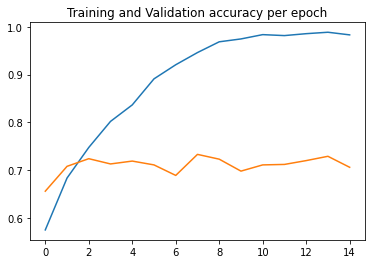

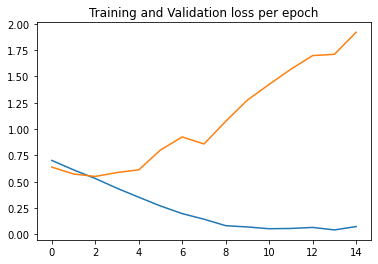

In [40]:
acc = history.history['accuracy'] # train accuracy
val_acc = history.history[ 'val_accuracy'] # validation accuracy
loss = history.history[ 'loss']
val_loss = history.history[ 'val_loss']

epochs = range(len(acc))

# Plot Training and Validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation accuracy per epoch')
plt.figure()

# Plot Training and Validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss per epoch')

In [ ]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)